## About Dataset

1. longitude: A measure of how far west a house is; a higher value is farther west

2. latitude: A measure of how far north a house is; a higher value is farther north

3. housingMedianAge: Median age of a house within a block; a lower number is a newer building

4. totalRooms: Total number of rooms within a block

5. totalBedrooms: Total number of bedrooms within a block

6. population: Total number of people residing within a block

7. households: Total number of households, a group of people residing within a home unit, for a block

8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)

9. medianHouseValue: Median house value for households within a block (measured in US Dollars)

10. oceanProximity: Location of the house w.r.t ocean/sea

## Importing Required Libraries

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")

## Loading Dataset

In [2]:
data = pd.read_csv('housingdata.csv')

## Exploratory Data Analysis

In [3]:
data.shape

(20640, 10)

In [4]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


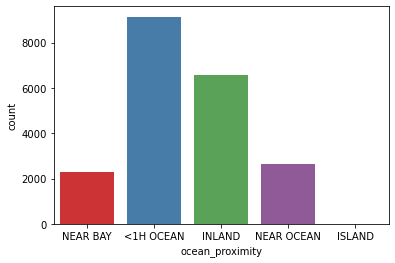

In [7]:
sns.countplot(data['ocean_proximity'], palette = "Set1")
plt.show()

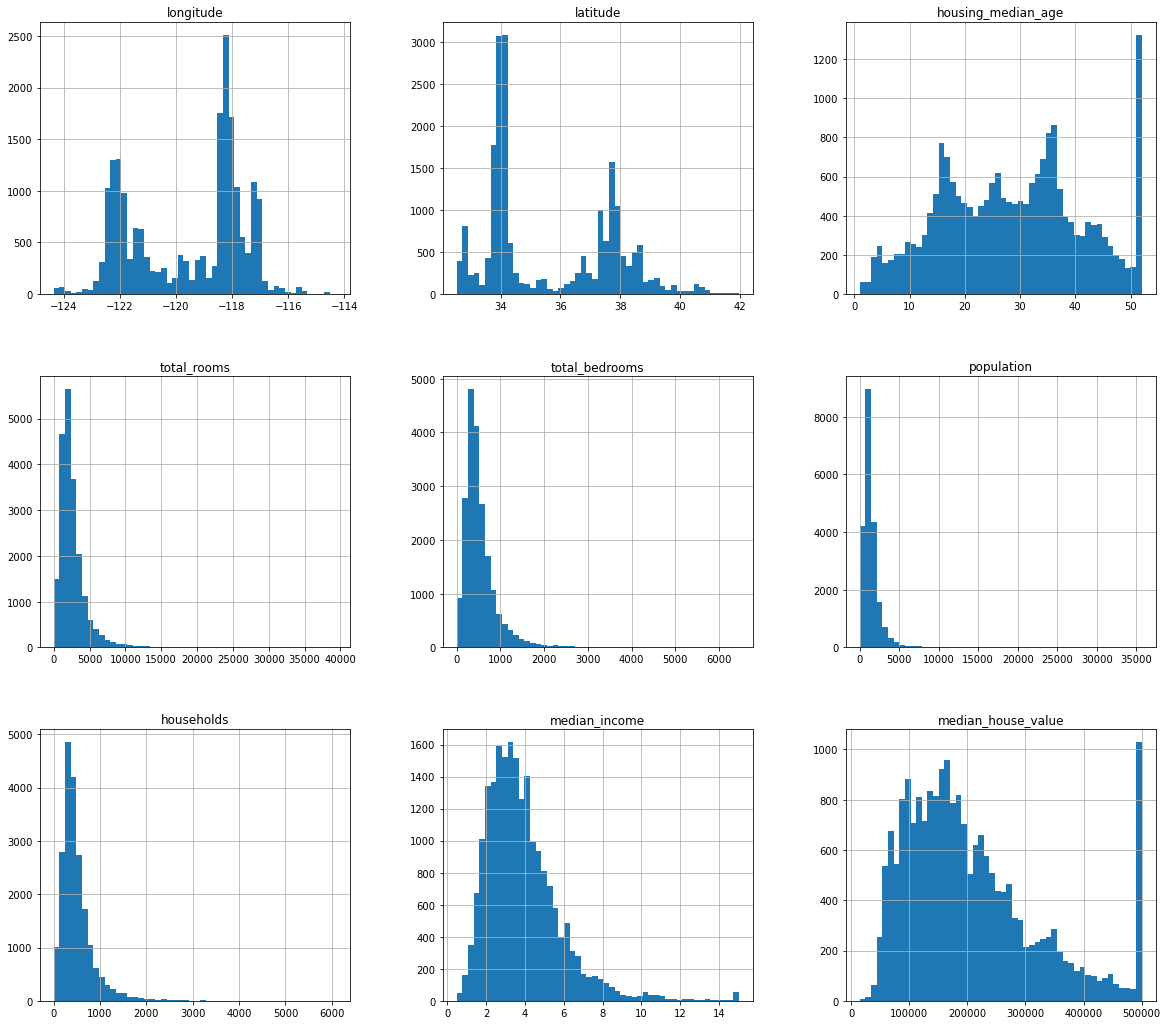

In [8]:
data.hist(bins = 50,figsize = (20,18))
plt.show()

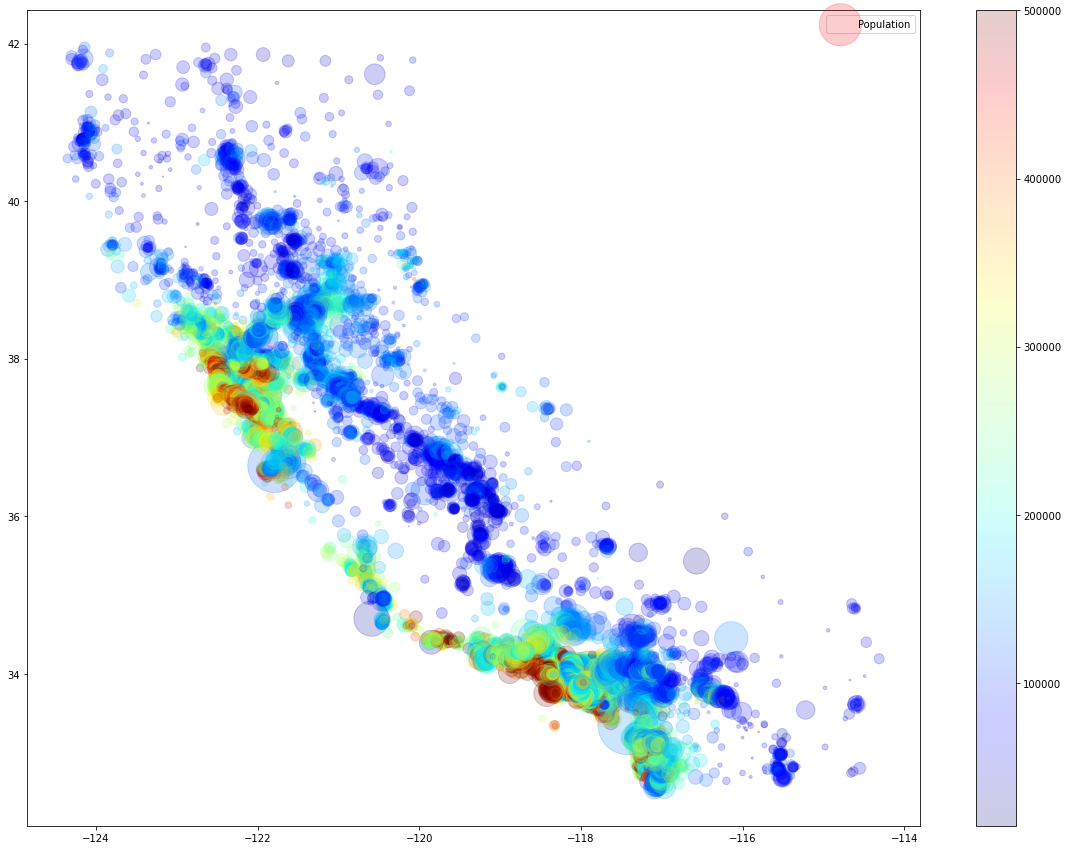

In [9]:
plt.figure(figsize = (20, 15))
plt.scatter(x = data.longitude, y = data.latitude, alpha = 0.2,
            s = data.population/10, label = "Population", 
           c = data.median_house_value, cmap = 'jet')
plt.colorbar()
plt.legend()
plt.show()

In [10]:
corr_matrix = data.corr()
corr_matrix.median_house_value.sort_values(ascending = False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

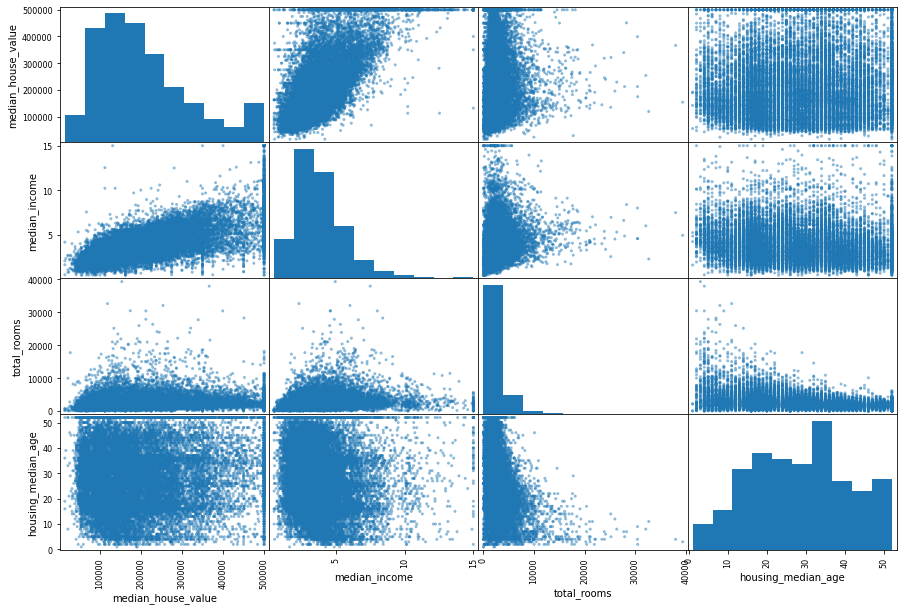

In [11]:
features = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
pd.plotting.scatter_matrix(data[features], figsize = (15,10))
plt.show()

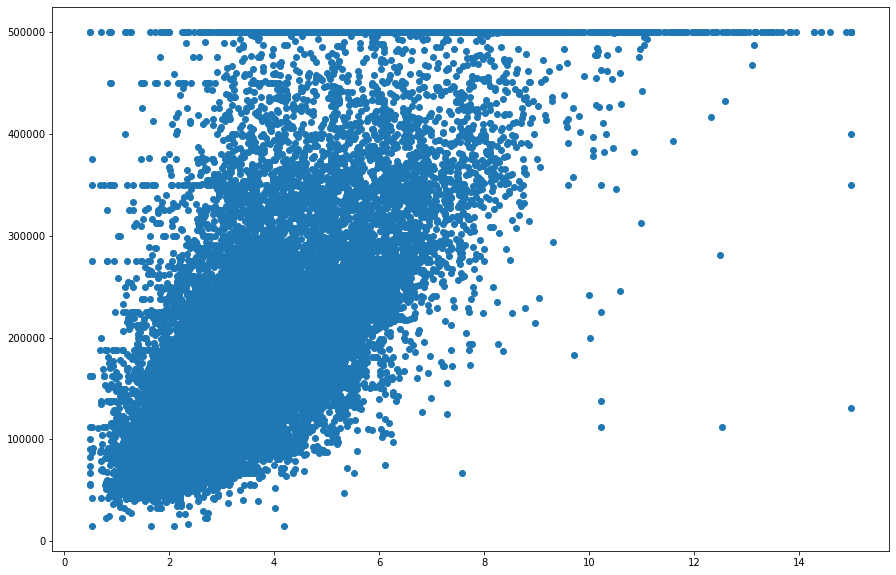

In [12]:
plt.figure(figsize = (15,10))
plt.scatter(x = data.median_income, y = data.median_house_value)
plt.show()

In [13]:
data = data[data.median_house_value <= 500000]

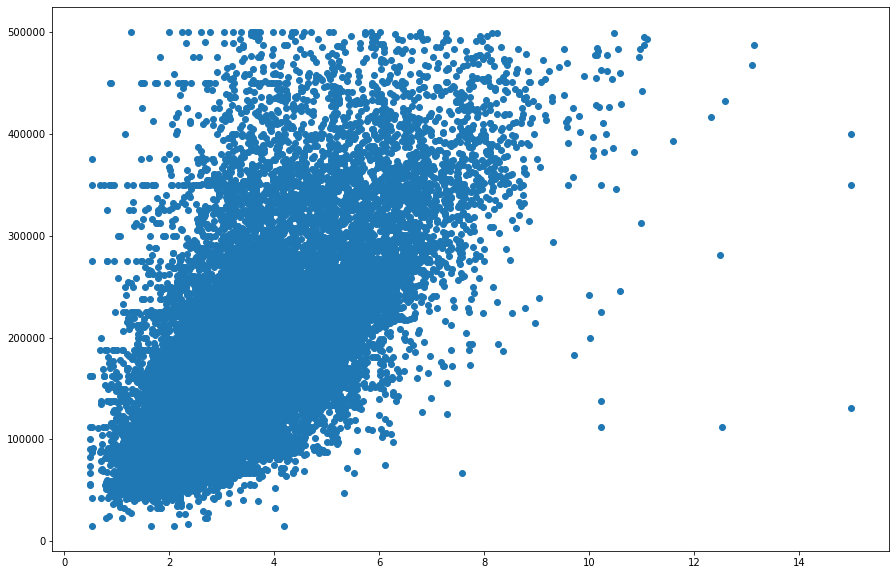

In [14]:
plt.figure(figsize = (15,10))
plt.scatter(x = data.median_income, y = data.median_house_value)
plt.show()

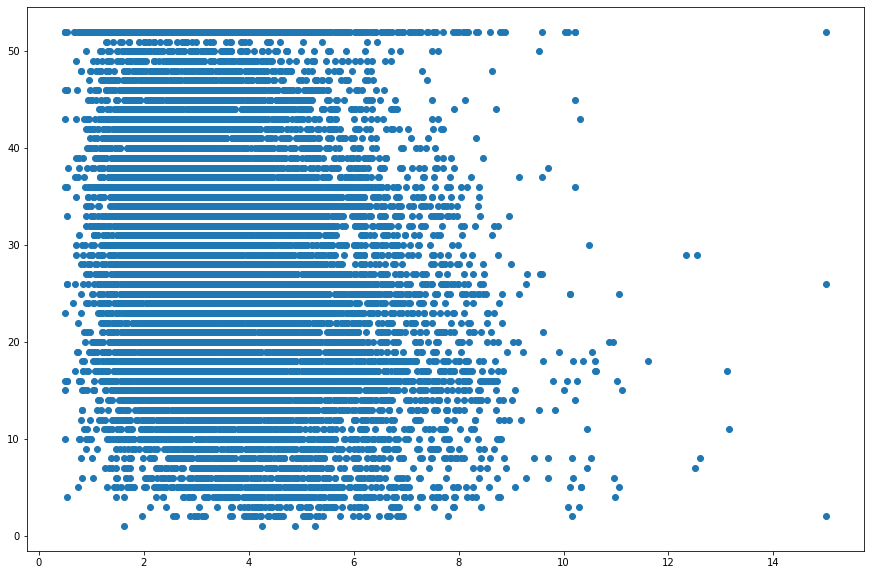

In [15]:
plt.figure(figsize = (15,10))
plt.scatter(x = data.median_income, y = data.housing_median_age)
plt.show()

In [16]:
data[data.housing_median_age > 50].housing_median_age.value_counts()

52.0    1103
51.0      44
Name: housing_median_age, dtype: int64

In [17]:
data = data[data.housing_median_age != 52]

In [18]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [19]:
data["total_rooms_per_households"] = data["total_rooms"]/data["households"]
data["total_bedrooms_per_total_rooms"] = data["total_bedrooms"]/data["total_rooms"]
data["population_per_households"] = data["population"]/data["households"]

In [20]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,total_rooms_per_households,total_bedrooms_per_total_rooms,population_per_households
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY,4.294118,0.260274,2.026891
15,-122.26,37.85,50.0,1120.0,283.0,697.0,264.0,2.1250,140000.0,NEAR BAY,4.242424,0.252679,2.640152
18,-122.26,37.84,50.0,2239.0,455.0,990.0,419.0,1.9911,158700.0,NEAR BAY,5.343675,0.203216,2.362768


In [21]:
corr_matrix = data.corr()
corr_matrix.median_house_value.sort_values(ascending=False)

median_house_value                1.000000
median_income                     0.661039
total_rooms                       0.152606
total_rooms_per_households        0.113842
households                        0.100220
total_bedrooms                    0.079721
population                        0.021616
housing_median_age                0.014772
population_per_households        -0.020347
longitude                        -0.022165
latitude                         -0.172126
total_bedrooms_per_total_rooms   -0.229234
Name: median_house_value, dtype: float64

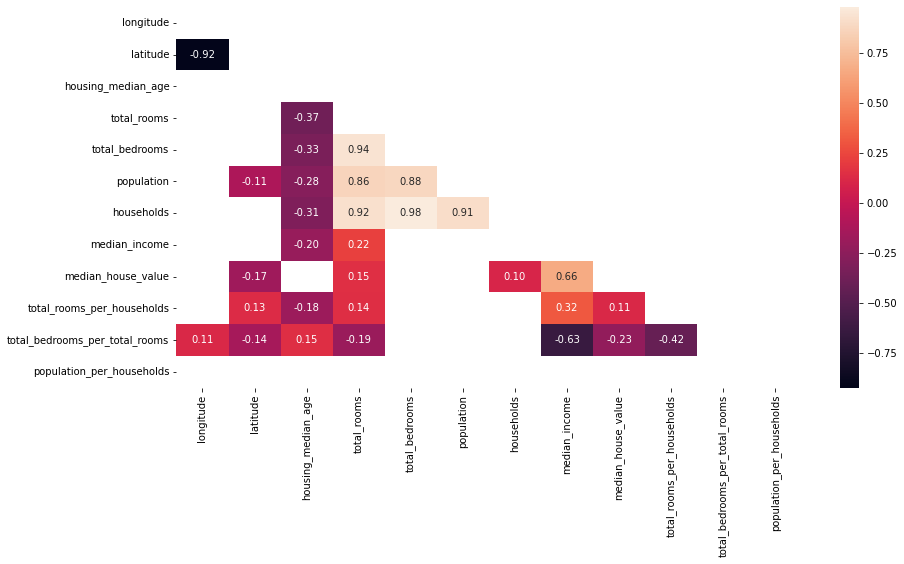

In [22]:
corr_matrix = data.corr()
corr_matrix = corr_matrix[corr_matrix.abs() > 0.1]
mask_ut=np.triu(np.ones(corr_matrix.shape)).astype(np.bool)
plt.figure(figsize = (14,7))
sns.heatmap(corr_matrix, annot= True, fmt = '.2f', cbar = True, mask= mask_ut)
plt.show()

## Data Preparation

In [23]:
X = data.drop("median_house_value", axis = 1)
Y = data["median_house_value"]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)
x_train_num = x_train.drop("ocean_proximity", axis = 1)

In [24]:
print(x_train.shape)
print(x_test.shape)

(14857, 12)
(3715, 12)


In [25]:
x_train_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14857 entries, 13720 to 2900
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   longitude                       14857 non-null  float64
 1   latitude                        14857 non-null  float64
 2   housing_median_age              14857 non-null  float64
 3   total_rooms                     14857 non-null  float64
 4   total_bedrooms                  14708 non-null  float64
 5   population                      14857 non-null  float64
 6   households                      14857 non-null  float64
 7   median_income                   14857 non-null  float64
 8   total_rooms_per_households      14857 non-null  float64
 9   total_bedrooms_per_total_rooms  14708 non-null  float64
 10  population_per_households       14857 non-null  float64
dtypes: float64(11)
memory usage: 1.4 MB


In [26]:
# ========================================SimpleImputer=========================================
imputer = SimpleImputer(missing_values = np.nan, strategy='median')
imputer.fit(x_train_num)
x = imputer.transform(x_train_num)     # transform returns a numpy array

x_train_num_imputed = pd.DataFrame(x, columns = x_train_num.columns)
x_train_num_imputed.info()
x_train_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14857 entries, 0 to 14856
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   longitude                       14857 non-null  float64
 1   latitude                        14857 non-null  float64
 2   housing_median_age              14857 non-null  float64
 3   total_rooms                     14857 non-null  float64
 4   total_bedrooms                  14857 non-null  float64
 5   population                      14857 non-null  float64
 6   households                      14857 non-null  float64
 7   median_income                   14857 non-null  float64
 8   total_rooms_per_households      14857 non-null  float64
 9   total_bedrooms_per_total_rooms  14857 non-null  float64
 10  population_per_households       14857 non-null  float64
dtypes: float64(11)
memory usage: 1.2 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 14857 e

In [27]:
# =============================================Feature Scaling=================================================
from sklearn.preprocessing import StandardScaler

feature_scal = StandardScaler()
x_train_num_scaled = pd.DataFrame(feature_scal.fit_transform(x_train_num_imputed.values), columns = x_train_num_imputed.columns)
x_train_num_scaled.head()

#================================================OneHotEncoder==================================================
# we use this type of encoding when there is a few number of category
from sklearn.preprocessing import OneHotEncoder

encoder_1hot = OneHotEncoder(sparse = False)      # if sparse == True it will fill null values with zero
x_train_cat_1hot_tmp = encoder_1hot.fit_transform(x_train[["ocean_proximity"]])
x_train_cat_1hot = pd.DataFrame(x_train_cat_1hot_tmp)
x_train_cat_1hot.columns = encoder_1hot.get_feature_names(["prox"])
x_train_cat_1hot.drop('prox_<1H OCEAN', axis = 1, inplace = True)
final_x_train = pd.concat([x_train_num_scaled, x_train_cat_1hot], axis =1)
final_x_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,total_rooms_per_households,total_bedrooms_per_total_rooms,population_per_households,prox_INLAND,prox_ISLAND,prox_NEAR BAY,prox_NEAR OCEAN
0,1.161055,-0.706311,0.094497,-0.614567,-0.628588,-0.502098,-0.653847,-1.005223,-0.111614,-0.004848,0.027680,1.0,0.0,0.0,0.0
1,-0.176590,0.547248,-1.043434,0.277857,0.523979,0.226091,0.319617,-1.094235,-0.083340,0.377478,-0.032728,1.0,0.0,0.0,0.0
2,0.540186,-0.734272,1.495028,-0.298060,-0.359734,-0.437219,-0.371311,0.580141,0.045617,-0.326215,-0.041711,0.0,0.0,0.0,0.0
3,0.731999,-0.687671,0.969829,-0.268388,-0.436883,-0.414169,-0.456072,1.422564,0.350123,-0.730040,-0.013297,1.0,0.0,0.0,0.0
4,1.140864,-1.284160,-0.868368,-0.696391,-0.843671,-0.785520,-0.782272,1.312480,0.035854,-0.867313,-0.036353,0.0,0.0,0.0,1.0


In [28]:
x_test_num = x_test.drop('ocean_proximity', axis = 1)
x_test_cat = x_test['ocean_proximity']

x_temp = imputer.transform(x_test_num)
x_test_num_imputed = pd.DataFrame(x_temp, columns = x_test_num.columns)

x_test_num_scaled = pd.DataFrame(feature_scal.transform(x_test_num_imputed.values), columns = x_test_num_imputed.columns)

x_test_cat_1hot_tmp = encoder_1hot.transform(x_test[["ocean_proximity"]])
x_test_cat_1hot = pd.DataFrame(x_test_cat_1hot_tmp)
x_test_cat_1hot.columns = encoder_1hot.get_feature_names(["prox"])
x_test_cat_1hot.drop('prox_<1H OCEAN', axis = 1, inplace = True)

final_x_test = pd.concat([x_test_num_scaled, x_test_cat_1hot], axis = 1)
final_x_test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,total_rooms_per_households,total_bedrooms_per_total_rooms,population_per_households,prox_INLAND,prox_ISLAND,prox_NEAR BAY,prox_NEAR OCEAN
0,0.600758,-0.720292,1.845160,-0.593437,-0.139975,0.402803,-0.057953,-0.800571,-1.067921,2.678774,0.071023,0.0,0.0,0.0,0.0
1,0.620949,-0.669031,0.357097,-0.645139,-0.490654,-0.741129,-0.458640,-0.537557,-0.675354,1.079028,-0.108399,0.0,0.0,0.0,0.0
2,0.706761,-0.822813,-0.080569,0.713054,0.093812,0.145845,0.183487,1.636091,0.789828,-1.383952,-0.025415,0.0,0.0,0.0,0.0
3,-0.802507,1.698285,1.057362,-0.258047,-0.268557,-0.464536,-0.222338,-1.086189,-0.176662,-0.138813,-0.077881,1.0,0.0,0.0,0.0
4,1.206485,-1.293480,-1.743699,1.540738,1.489516,1.055868,1.362431,1.198948,0.191934,-0.358291,-0.043956,0.0,0.0,0.0,1.0


In [29]:
x_tr, x_val, y_tr, y_val = train_test_split(final_x_train, y_train, test_size = 0.2, random_state = 2)
x_tr.shape

(11885, 15)

# Model Creation

## 1.Linear Regression

In [30]:
# Model creation
lin_reg = LinearRegression()
lin_reg.fit(x_tr, y_tr)

# Prediction
housing_prediction = lin_reg.predict(x_tr)

# Evaluation
# RMSE         ROOT MEAN SQUARED ERROR
lin_mse = mean_squared_error(y_tr, housing_prediction)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

57925.26513578029


## 2.Decision Tree

In [31]:
tree_reg = DecisionTreeRegressor()
scores = cross_val_score(estimator = tree_reg, X = x_tr, y = y_tr, scoring = "neg_mean_squared_error", cv = 10)
trees_rmse_scores = np.sqrt(-scores)

def display_scores(scores, model_name):
    print("==============",model_name, "================")
    print("scores: ", scores)
    print("mean: ", scores.mean())
    print("standard deviation: ", scores.std())

display_scores(trees_rmse_scores, "Decision Tree Regression")

============== Decision Tree Regression ================
scores:  [64432.38467667 63988.47674068 68437.63258798 61606.4186251
 65745.01803919 62844.75119312 61263.25939626 65305.35137606
 66541.17880254 63678.18725424]
mean:  64384.26586918443
standard deviation:  2103.9684825557742


## 3.Linear Regression (cross validation)

In [32]:
linear_scores = cross_val_score(estimator = lin_reg, X = x_tr, y = y_tr, scoring = "neg_mean_squared_error", cv = 10)
linear_rmse_scores = np.sqrt(-linear_scores)
display_scores(linear_rmse_scores, "Linear Regression")

============== Linear Regression ================
scores:  [58187.31962865 56133.84236726 61383.75203265 60201.72818677
 58137.1766454  58708.42889301 55756.16770983 57157.50049796
 58785.04527679 57463.6700846 ]
mean:  58191.463132292556
standard deviation:  1631.4919558723507


## 4.Random Forest

In [33]:
forest_reg = RandomForestRegressor()
forest_reg.fit(x_tr, y_tr)
forest_scores = cross_val_score(estimator = forest_reg, X = x_tr, y = y_tr, scoring = "neg_mean_squared_error", cv = 10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores, "Random Forest Regressor")

============== Random Forest Regressor ================
scores:  [45364.11874678 44828.53927629 47569.88757584 43463.7616157
 44559.54004894 45024.88200812 43074.57429262 44660.00185204
 45666.27624229 45794.5967231 ]
mean:  45000.617838172744
standard deviation:  1192.4396383720928


##  5.XGBoost

In [34]:
xgb_reg = XGBRegressor()
xgb_reg.fit(x_tr, y_tr)
xgb_scores = cross_val_score(estimator= xgb_reg, X = x_tr, y = y_tr, scoring = "neg_mean_squared_error", cv = 10)
xgb_rmse_scores = np.sqrt(-xgb_scores)
display_scores(xgb_rmse_scores, "XGBoost Regressor")

============== XGBoost Regressor ================
scores:  [42127.62841773 42696.44301058 45278.75619579 40766.9943858
 43212.28608052 43971.78827286 41279.85298306 41772.70314317
 42292.04832359 42882.88380115]
mean:  42628.138461424074
standard deviation:  1249.7570083677442


# Hyperparameter Tuning

In [35]:
#1,10,100,200,300,
parameters={"max_depth" : [1,3,5,7,9,11,12],
            "n_estimators": [500],
            "learning_rate": [0.1,0.15,0.20,0.25,0.30]}

xgb_tuning = GridSearchCV(estimator = XGBRegressor(), param_grid= parameters, cv = 5, verbose = 2)
xgb_tuning.fit(final_x_train, y_train)

Fitting 5 folds for each of 35 candidates, totalling 175 fits
[CV] END ...learning_rate=0.1, max_depth=1, n_estimators=500; total time=   1.0s
[CV] END ...learning_rate=0.1, max_depth=1, n_estimators=500; total time=   1.1s
[CV] END ...learning_rate=0.1, max_depth=1, n_estimators=500; total time=   1.0s
[CV] END ...learning_rate=0.1, max_depth=1, n_estimators=500; total time=   1.0s
[CV] END ...learning_rate=0.1, max_depth=1, n_estimators=500; total time=   1.0s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=500; total time=   3.0s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=500; total time=   2.8s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=500; total time=   2.7s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=500; total time=   2.8s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=500; total time=   3.0s
[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=500; total time=   5.7s
[CV] END ...learning_rate=0.1, max_depth=5, n_e

[CV] END ..learning_rate=0.2, max_depth=12, n_estimators=500; total time=  14.8s
[CV] END ..learning_rate=0.2, max_depth=12, n_estimators=500; total time=  15.6s
[CV] END ..learning_rate=0.2, max_depth=12, n_estimators=500; total time=  15.0s
[CV] END ..learning_rate=0.2, max_depth=12, n_estimators=500; total time=  14.8s
[CV] END ..learning_rate=0.25, max_depth=1, n_estimators=500; total time=   0.9s
[CV] END ..learning_rate=0.25, max_depth=1, n_estimators=500; total time=   0.9s
[CV] END ..learning_rate=0.25, max_depth=1, n_estimators=500; total time=   0.9s
[CV] END ..learning_rate=0.25, max_depth=1, n_estimators=500; total time=   0.9s
[CV] END ..learning_rate=0.25, max_depth=1, n_estimators=500; total time=   0.9s
[CV] END ..learning_rate=0.25, max_depth=3, n_estimators=500; total time=   2.6s
[CV] END ..learning_rate=0.25, max_depth=3, n_estimators=500; total time=   2.6s
[CV] END ..learning_rate=0.25, max_depth=3, n_estimators=500; total time=   2.6s
[CV] END ..learning_rate=0.2

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                                    subsample=None, tree_method=None,
                                    validate_parameters=None, verbosity=None),
             param_grid={'learning_rate': [0.1, 0.15, 0.2, 0.25, 0.3],
                         'max_depth': [1, 3, 5, 7, 9, 11, 12],
                         'n_estimators': [500]},
             verbose=2)

In [36]:
xgb_tuning.best_score_

0.8182256758852768

In [37]:
xgb_tuning.best_params_

{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 500}

In [41]:
final_xgb_reg = XGBRegressor()
final_xgb_reg.fit(final_x_train, y_train)
train_prediction = final_xgb_reg.predict(final_x_train)
test_prediction = final_xgb_reg.predict(final_x_test)

train_rmse = np.sqrt(mean_squared_error(y_train, train_prediction))
test_rmse = np.sqrt(mean_squared_error(y_test, test_prediction))

print("Train RMSE : ", train_rmse)
print("Test RMSE : ", test_rmse)

Train RMSE :  23989.799880953193
Test RMSE :  41468.57171390097
